<a href="https://colab.research.google.com/github/nguyenvantai102/CS114.L21.KHCL/blob/main/TestDiscoveryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. READ DATA

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
score_training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_ML/score_training.csv')
wecode = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_ML/wecode.csv')

Mounted at /content/drive


In [ ]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [ ]:
score_training

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


## 2. LẤY NHỮNG CỘT CẦN THIẾT

### 2.1 Những cột cần thiết trong file score_training

In [ ]:
score = score_training.sort_values("CK").reset_index()[['id','CK']]
score

,id,CK
0,960,0
1,562,0
2,1529,0
3,1193,0
4,1471,0
...,...,...
970,1319,
971,876,
972,1217,
973,989,


In [ ]:
score.dtypes

id     int64
CK    object
dtype: object

In [ ]:
score.CK.value_counts()

8      104
7.5     94
7       78
8.5     73
6.5     67
6       63
5.5     61
9       61
5       60
        54
4       48
4.5     48
9.5     30
3.5     29
2.5     28
3       25
0       24
2       10
1.5      6
1        6
0.5      3
10       2
Name: CK, dtype: int64

##### ? Cần biết giá trị của kí tự trắng kia là gì

In [ ]:
value = {}
for i in range(len(score)):
   if score.iloc[i,1] not in value:
     value.update({score.iloc[i,1]:len(value)})
value

{'0': 0,
 '0.5': 1,
 '1': 2,
 '1.5': 3,
 '10': 4,
 '2': 5,
 '2.5': 6,
 '3': 7,
 '3.5': 8,
 '4': 9,
 '4.5': 10,
 '5': 11,
 '5.5': 12,
 '6': 13,
 '6.5': 14,
 '7': 15,
 '7.5': 16,
 '8': 17,
 '8.5': 18,
 '9': 19,
 '9.5': 20,
 nan: 22,
 '\xa0': 21}

In [ ]:
value

{'0': 0,
 '0.5': 1,
 '1': 2,
 '1.5': 3,
 '10': 4,
 '2': 5,
 '2.5': 6,
 '3': 7,
 '3.5': 8,
 '4': 9,
 '4.5': 10,
 '5': 11,
 '5.5': 12,
 '6': 13,
 '6.5': 14,
 '7': 15,
 '7.5': 16,
 '8': 17,
 '8.5': 18,
 '9': 19,
 '9.5': 20,
 nan: 22,
 '\xa0': 21}

In [ ]:
score_null = score.loc[score.CK == "\xa0"]

##### Thành quả - kiểm tra lại

In [ ]:
score = score.loc[score.CK != "\xa0"]

In [ ]:
score.CK.value_counts()

8      104
7.5     94
7       78
8.5     73
6.5     67
6       63
5.5     61
9       61
5       60
4.5     48
4       48
9.5     30
3.5     29
2.5     28
3       25
0       24
2       10
1.5      6
1        6
0.5      3
10       2
Name: CK, dtype: int64

In [ ]:
score.CK = score.CK.apply(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
score.dtypes

id      int64
CK    float64
dtype: object

### 2.2 Lấy những cột cần thiết trong file wecode

In [ ]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


Bỏ đi một số cột nghĩ là không quan trọng và không có ảnh hưởng gì đến điểm số: file_name, language_id, created_at, updated_at, status

In [ ]:
wecode1 = wecode.iloc[:,0:8].drop("status", axis=1)
wecode1

,id,assignment_id,problem_id,user_id,is_final,pre_score,coefficient
0,4,0,3,4,1,10000,100
1,5,0,4,4,1,10000,100
2,6,0,5,4,0,0,100
3,7,0,5,4,0,0,100
4,8,0,5,4,0,0,100
...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,0,100
264602,266668,0,25,1796,0,0,100
264603,266669,0,25,1796,1,10000,100
264604,266670,0,150,255,1,6250,100


In [ ]:
wecode1.assignment_id.nunique()

290

Khi cắt bớt các cột thì thấy vẫn còn dư thừa cột id, asignment_id

In [ ]:
wecode2 = wecode1.iloc[:,2:]
wecode2

,problem_id,user_id,is_final,pre_score,coefficient
0,3,4,1,10000,100
1,4,4,1,10000,100
2,5,4,0,0,100
3,5,4,0,0,100
4,5,4,0,0,100
...,...,...,...,...,...
264601,25,1796,0,0,100
264602,25,1796,0,0,100
264603,25,1796,1,10000,100
264604,150,255,1,6250,100


In [ ]:
wecode2.coefficient.nunique()

129

### 2.3 Phân tích, phán đoán những giá trị có thể ảnh hưởng đến điểm thi cuối kì
- số bài nộp cuối cùng/ tổng số bài nộp
- số lần nộp lại
- tổng số phần trăm test đúng
- điểm: tổng (phần trăm test đúng *coeficient)

#### *Số bài nộp cuối cùng

In [ ]:
count_is_final = wecode2.groupby("user_id")[["is_final"]].sum().reset_index().rename(columns={'user_id':'id','is_final' : 'count_is_final'})
count_is_final

,id,count_is_final
0,1,2
1,4,38
2,5,5
3,6,88
4,7,2
...,...,...
1154,1860,48
1155,1862,6
1156,1864,63
1157,1865,17


@ Join 

In [ ]:
df = count_is_final.merge(score, on='id', how="inner")
df

,id,count_is_final,CK
0,24,77,9.5
1,27,5,10.0
2,29,80,8.5
3,34,84,6.5
4,35,151,4.5
...,...,...,...
802,1856,31,7.5
803,1857,40,4.0
804,1859,30,1.5
805,1862,6,7.5


In [ ]:
df.dtypes

id                  int64
count_is_final      int64
CK                float64
dtype: object

@ Vẽ đồ thị biểu diễn

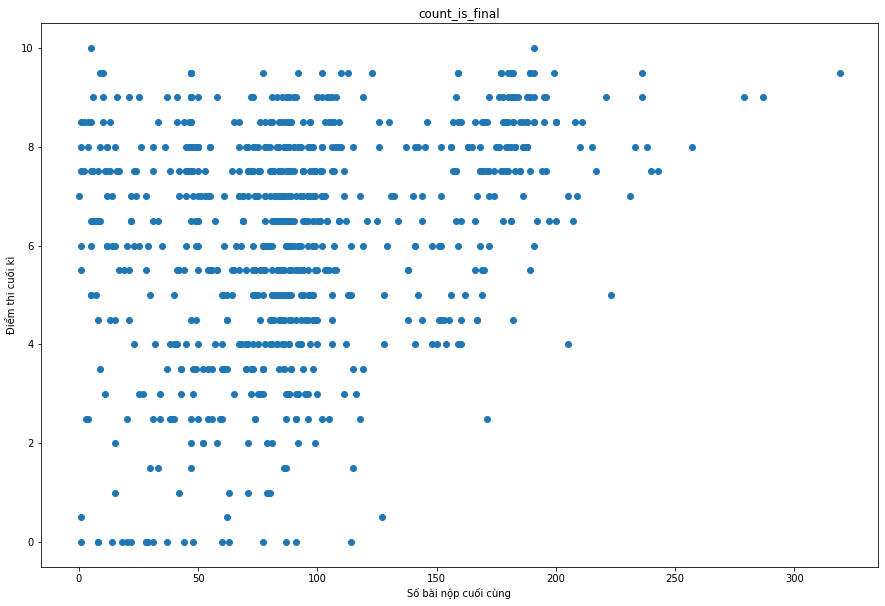

In [ ]:
import matplotlib.pyplot as plt
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['count_is_final'], y = df['CK'])
axs.set_title("count_is_final")
axs.set(xlabel='Số bài nộp cuối cùng', ylabel='Điểm thi cuối kì')
plt.show()

#### *Tổng số bài nộp

In [ ]:
count_submit = wecode2.groupby("user_id")[["is_final"]].count().reset_index().rename(columns={'user_id':'id','is_final' : 'count_submit'})           
count_submit

,id,count_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


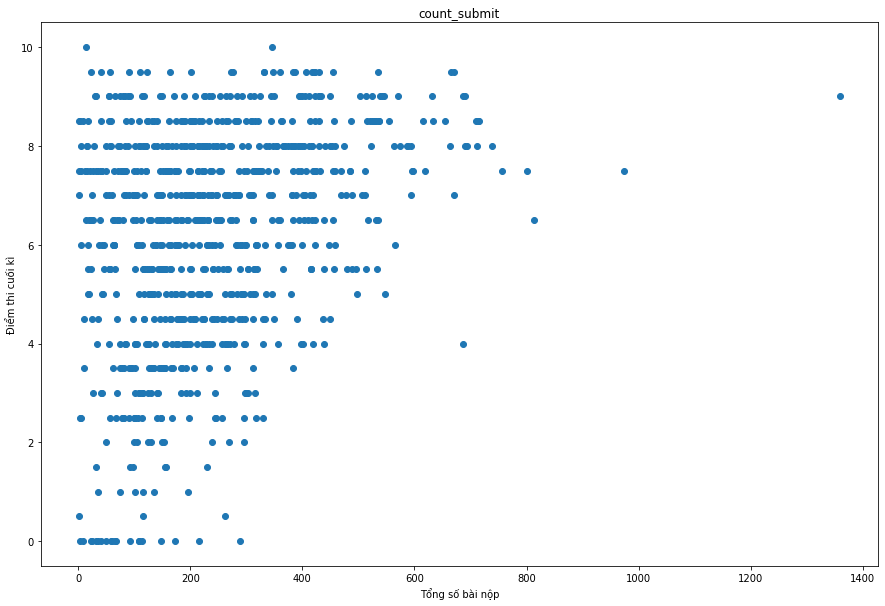

In [ ]:
df = count_submit.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['count_submit'], y = df['CK'])
axs.set_title("count_submit")
axs.set(xlabel='Tổng số bài nộp', ylabel='Điểm thi cuối kì')
plt.show()

#### *Tổng phần trăm test đúng
Bài nộp phải là cuối cùng, giá trị có thể ảnh hưởng vì nhiều thành phần sinh viên thường trễ deadline ko phải vì học kém

In [ ]:
sum_test_true = (wecode2.loc[wecode2.is_final == 1]).groupby("user_id")[["pre_score"]].sum().reset_index().rename(columns={'user_id':'id','pre_score' : 'sum_test_true'})
sum_test_true

,id,sum_test_true
0,1,10000
1,4,370000
2,5,30000
3,6,850000
4,7,9209
...,...,...
1152,1860,329665
1153,1862,40000
1154,1864,439741
1155,1865,116428


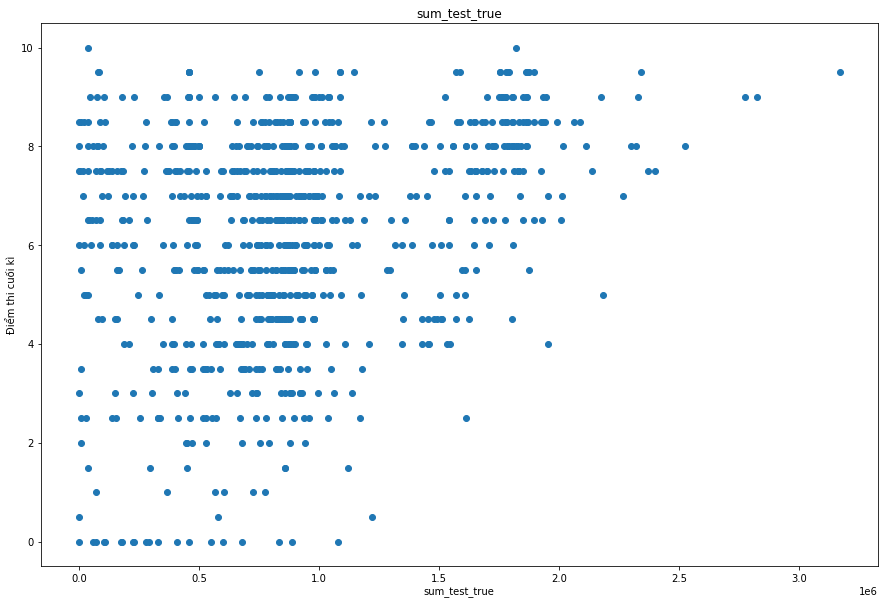

In [ ]:
df = sum_test_true.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['sum_test_true'], y = df['CK'])
axs.set_title("sum_test_true")
axs.set(xlabel='sum_test_true', ylabel='Điểm thi cuối kì')
plt.show()

#### *Điểm: Sum(phần trăm test đúng *coeficient)

In [ ]:
wecode2.dtypes

problem_id      int64
user_id         int64
is_final        int64
pre_score       int64
coefficient    object
dtype: object

COEFICIENT có giá trị không phải là số, nên cần phải kiểm tra lại và gán lại giá trị

In [ ]:
wecode2.coefficient.value_counts()

100      257952
0          2805
120         634
70          610
error       252
          ...  
73            2
109           1
40            1
66            1
22            1
Name: coefficient, Length: 129, dtype: int64

In [ ]:
wecode2.loc[wecode2.coefficient == "error"] = 0

In [ ]:
wecode2.coefficient = wecode2.coefficient.apply(int)

In [ ]:
wecode2.dtypes

problem_id     int64
user_id        int64
is_final       int64
pre_score      int64
coefficient    int64
dtype: object

Tính [pre_score]*[coefficient]

In [ ]:
wecode2["sum_score"] = wecode2["pre_score"] * wecode2["coefficient"]
wecode2

,problem_id,user_id,is_final,pre_score,coefficient,sum_score
0,3,4,1,10000,100,1000000
1,4,4,1,10000,100,1000000
2,5,4,0,0,100,0
3,5,4,0,0,100,0
4,5,4,0,0,100,0
...,...,...,...,...,...,...
264601,25,1796,0,0,100,0
264602,25,1796,0,0,100,0
264603,25,1796,1,10000,100,1000000
264604,150,255,1,6250,100,625000


In [ ]:
sum_score = (wecode2.loc[wecode2.is_final == 1]).groupby("user_id")["sum_score"].sum().reset_index().rename(columns={'user_id':'id'})
sum_score

,id,sum_score
0,1,1000000
1,4,37000000
2,5,3000000
3,6,85000000
4,7,920900
...,...,...
1152,1860,32966500
1153,1862,4000000
1154,1864,43974100
1155,1865,11642800


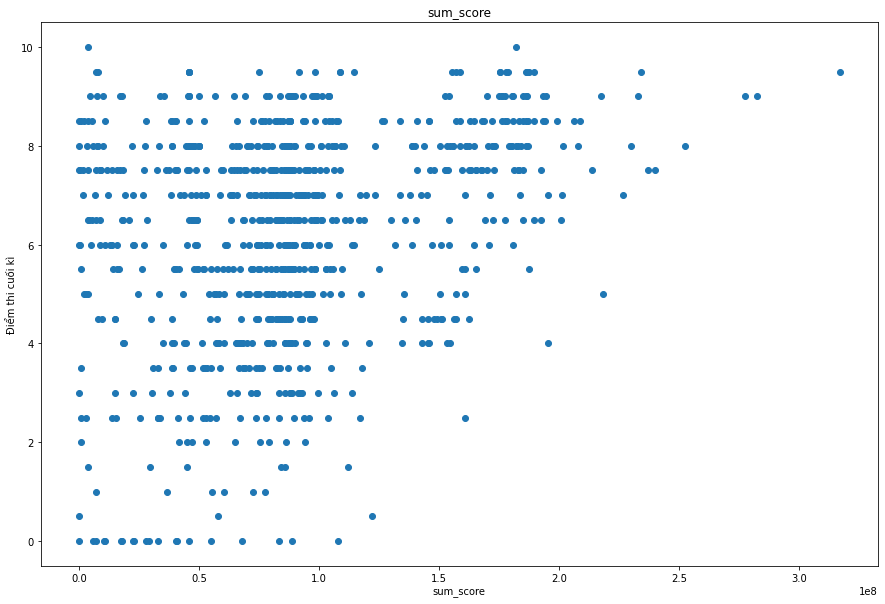

In [ ]:
df = sum_score.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['sum_score'], y = df['CK'])
axs.set_title("sum_score")
axs.set(xlabel='sum_score', ylabel='Điểm thi cuối kì')
plt.show()

#### Số lần nộp lại =  tổng số bài nộp-số bài nộp cuối cùng

In [ ]:
count_resumit = count_submit.merge(count_is_final, on='id', how="inner")
count_resumit["count_resumit"]= count_resumit["count_submit"] - count_resumit["count_is_final"]
count_resumit

,id,count_submit,count_is_final,count_resumit
0,1,2,2,0
1,4,54,38,16
2,5,6,5,1
3,6,130,88,42
4,7,5,2,3
...,...,...,...,...
1154,1860,76,48,28
1155,1862,12,6,6
1156,1864,187,63,124
1157,1865,99,17,82


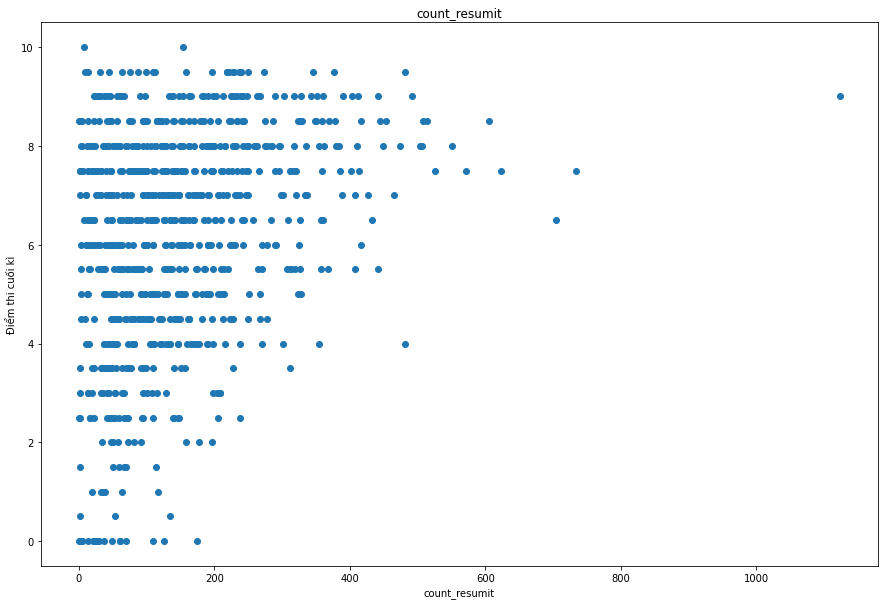

In [ ]:
df = count_resumit.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['count_resumit'], y = df['CK'])
axs.set_title("count_resumit")
axs.set(xlabel='count_resumit', ylabel='Điểm thi cuối kì')
plt.show()

#### Số lần nộp bài submit đúng 100%

In [ ]:
true_submit = (wecode2.loc[(wecode2.pre_score == 10000) & (wecode2.is_final == 1)]).groupby("user_id")[["is_final"]].count().reset_index().rename(columns={'user_id':'id','is_final' : 'true_submit'})           
true_submit

,id,true_submit
0,1,1
1,4,37
2,5,3
3,6,85
4,11,9
...,...,...
1134,1860,28
1135,1862,4
1136,1864,28
1137,1865,10


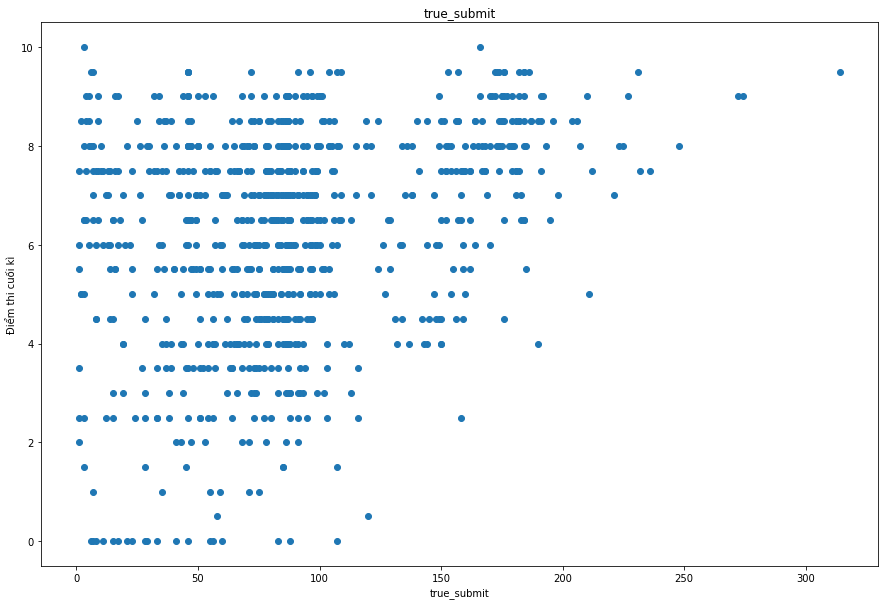

In [ ]:
df = true_submit.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['true_submit'], y = df['CK'])
axs.set_title("true_submit")
axs.set(xlabel='true_submit', ylabel='Điểm thi cuối kì')
plt.show()

In [ ]:
wecode2


,problem_id,user_id,is_final,pre_score,coefficient,sum_score
0,3,4,1,10000,100,1000000
1,4,4,1,10000,100,1000000
2,5,4,0,0,100,0
3,5,4,0,0,100,0
4,5,4,0,0,100,0
...,...,...,...,...,...,...
264601,25,1796,0,0,100,0
264602,25,1796,0,0,100,0
264603,25,1796,1,10000,100,1000000
264604,150,255,1,6250,100,625000


In [ ]:
wecode2.value_counts("problem_id")

problem_id
86     4728
6      4407
4      4213
240    3833
319    3349
       ... 
153       1
155       1
156       1
157       1
115       1
Length: 635, dtype: int64

In [ ]:
#số problem xanh
problem = (wecode2.loc[wecode2.pre_score == 10000]).groupby(["user_id","problem_id"])[["pre_score"]].max().reset_index() 
count_problem = problem.groupby(["user_id"])[["problem_id"]].count().reset_index().rename(columns={"user_id":"id",'problem_id':'count_problem'})   
count_problem

,id,count_problem
0,1,1
1,4,40
2,5,3
3,6,85
4,11,12
...,...,...
1134,1860,26
1135,1862,4
1136,1864,28
1137,1865,10


In [ ]:
count_problem.max()

id               1868
count_problem     203
dtype: int64

In [ ]:
count_problem["TiLe"] = count_problem["count_problem"]* 100//203
count_problem

,id,count_problem,TiLe
0,1,1,0
1,4,40,19
2,5,3,1
3,6,85,41
4,11,12,5
...,...,...,...
1134,1860,26,12
1135,1862,4,1
1136,1864,28,13
1137,1865,10,4


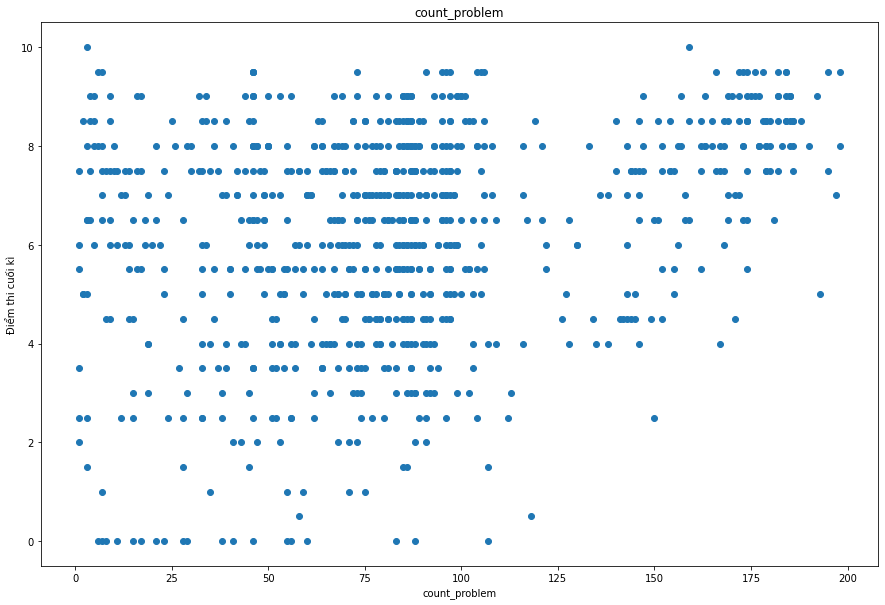

In [ ]:
df = count_problem.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['count_problem'], y = df['CK'])
axs.set_title("count_problem")
axs.set(xlabel='count_problem', ylabel='Điểm thi cuối kì')
plt.show()

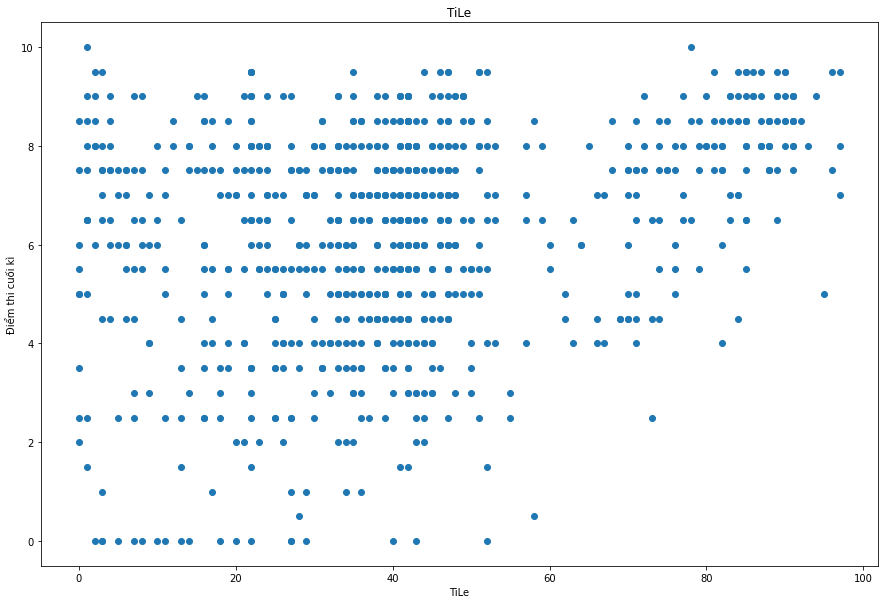

In [ ]:
df = count_problem.merge(score, on='id', how="inner")
fig, (axs) = plt.subplots(1,1, figsize = (15,10))
axs.scatter(x = df['TiLe'], y = df['CK'])
axs.set_title("TiLe")
axs.set(xlabel='TiLe', ylabel='Điểm thi cuối kì')
plt.show()

In [ ]:
df.loc[df.CK == 10]

,id,count_problem,TiLe,CK
1,27,3,1,10.0
139,343,159,78,10.0
